### 1. Import & Clean the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
path = "/home/akash/Akash/Data Science/3. IBM Data Science Professional Certificate/Assignment Jupyter notebook/Car Price Prediction/car.csv"
car_data = pd.read_csv(path)
car_data.replace('?', np.NaN, inplace=True)
car_data = car_data.dropna(subset=['price'], axis=0).reset_index(drop=True)
car_data['symboling'] = car_data['symboling'].astype('object')

In [3]:
features = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']
#Create a list of numerical feature & categorical features
num_features = [feature for feature in features if car_data[feature].dtype != 'O']
cat_features = [feature for feature in features if car_data[feature].dtype == 'O']

In [4]:
from sklearn.impute import SimpleImputer
class Clean_data:
    def __init__(self, num_features, cat_features, data):
        self.num_features = num_features
        self.cat_features = cat_features
        self.data = data

#Create a function that will work on the missing data & use relevant strategy to replace null values
    def clean_data(self):
        #Strategy for numerical features
        num_data = self.data[self.num_features]
        num_imputer = SimpleImputer(missing_values = np.NaN, strategy ='mean')
        num_imputer = num_imputer.fit(num_data)
        # As the tranform keyword create a data in array w/o columns, changing it to dataframe & adding columns
        num_data = pd.DataFrame(num_imputer.transform(num_data))
        num_data.columns = self.num_features

        #Strategy for cat features
        cat_data = self.data[self.cat_features]
        cat_imputer = SimpleImputer(missing_values = np.NaN, strategy ='most_frequent')
        cat_imputer = cat_imputer.fit(cat_data)
        # As the tranform keyword create a data in array w/o columns, changing it to dataframe & adding columns
        cat_data = pd.DataFrame(cat_imputer.transform(cat_data))
        cat_data.columns = self.cat_features

        #Concatenation
        cleaned_data = pd.concat([num_data, cat_data], axis=1)

        return cleaned_data

In [5]:
# A dataframe without any missing values is created
cln_data = Clean_data(num_features, cat_features, car_data)
features_df = cln_data.clean_data()
df = pd.concat([features_df, car_data[['price']]], axis=1)

### 2. EDA with Visualization

In [6]:
class EDA_Visualization:
    def __init__(self, feature, target, data):
        self.feature = feature
        self.target = target
        self.data = data
#Create a function that will display the relationship through suitable visual chart
    def create_chart(self):
        if self.data[self.feature].dtype == 'O':
            return sns.boxplot(x=self.feature, y=self.target, data=self.data)
        else:
            return sns.scatterplot(x=self.feature, y=self.target, data=self.data)

<Axes: xlabel='engine-type', ylabel='price'>

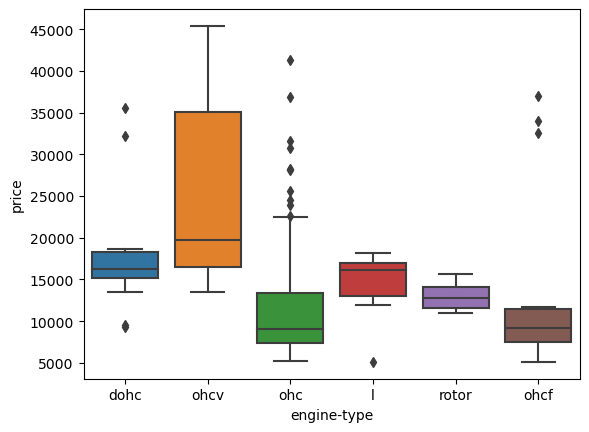

In [7]:
# Relationship between price & features can be visualized with this class
chart = EDA_Visualization('engine-type', 'price', df)
chart.create_chart()

### 3. Feature Selection

In [8]:
import scipy.stats
class Feature_selection:
    def __init__(self, features, target, data):
        self.features = features
        self.target = target
        self.data = data

#Create a function that will run a suitable statistical test to check the significance
    def feature_selection(self):
        significant_features = []
        insignificant_features =[]
        for feature in self.features:
            if self.data[feature].dtype == 'O':
                new_data = self.data[[self.target,feature]]
                grouped_data = new_data.groupby(feature)
                grp_array = [group[self.target].values for name, group in grouped_data]
                f_stat, p_val = scipy.stats.f_oneway(*grp_array)
                if p_val<0.05:
                    significant_features.append(feature)
                else:
                    insignificant_features.append(feature)
            else:
                new_data = self.data[[self.target,feature]]
                corr, p_val = scipy.stats.pearsonr(new_data[self.target],new_data[feature])
                if p_val<0.05:
                    significant_features.append(feature)
                else:
                    insignificant_features.append(feature)
        return significant_features, insignificant_features

In [9]:
#The class will give list of significant & insignificant features impacting price
select_features = Feature_selection(features, 'price', df)
significant_features, insignificant_features = select_features.feature_selection()
print('Significant Features are: ',significant_features, '\n', 
      'Insignificant Features are: ',insignificant_features)

Significant Features are:  ['symboling', 'make', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'horsepower', 'city-mpg', 'highway-mpg'] 
 Insignificant Features are:  ['normalized-losses', 'fuel-type', 'num-of-doors', 'height', 'stroke', 'compression-ratio', 'peak-rpm']


In [10]:
#Droping insignificant features
df1 = df.drop(insignificant_features, axis=1)
df1.head()

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,symboling,make,aspiration,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,price
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,3,alfa-romero,std,convertible,rwd,front,dohc,four,mpfi,13495.0
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,3,alfa-romero,std,convertible,rwd,front,dohc,four,mpfi,16500.0
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0,1,alfa-romero,std,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0,2,audi,std,sedan,fwd,front,ohc,four,mpfi,13950.0
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0,2,audi,std,sedan,4wd,front,ohc,five,mpfi,17450.0


### 4. Data Scaling / Normalization

In [11]:
new_features = list(df1.columns)
new_features.remove('price')
new_num_features = [feature for feature in new_features if df1[feature].dtype != 'O']
new_cat_features = [feature for feature in new_features if df1[feature].dtype == 'O']

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import scipy
class DataTransformation:
    def __init__(self, num_features, cat_features):
        self.num_features = num_features
        self.cat_features = cat_features
#Data normalization & onehotencoding    
    def data_transformation(self):
        num_pipeline = Pipeline(steps = [
                                    ('scaler', StandardScaler(with_mean=False))
                                    ]
                               )
        cat_pipeline = Pipeline(steps = [
                                    ('Onehotencoder', OneHotEncoder()),
                                    ('scaler', StandardScaler(with_mean=False))
                                    ]
                               )
        preprocessor = ColumnTransformer(
                                    [('num_pipeline', num_pipeline, self.num_features),
                                     ('cat_pipeline', cat_pipeline, self.cat_features)
                                    ]
                                        )
        return preprocessor

In [13]:
# This performs data scaling & onhotencoding
transformation = DataTransformation(new_num_features, new_cat_features)
preprocessor = transformation.data_transformation()
x = df1.drop(columns = ['price'], axis=1)
input_features = preprocessor.fit_transform(x).toarray()
input_features.shape

(201, 70)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
x_train, x_test, y_train, y_test = train_test_split(input_features, df1['price'], test_size=0.2, random_state=1)

models = {  'Decision Tree': DecisionTreeRegressor(),
            'Linear Regresssion': LinearRegression(),
            'K-Neighbors Regressor': KNeighborsRegressor(),
         }
def evaluate_models(x_train, y_train, x_test, y_test, models):
    report ={}

    for i in range(len(list(models))):
        model = list(models.values())[i]

        model.fit(x_train, y_train)  #Train model
        y_test_pred = model.predict(x_test)

        test_model_score = r2_score(y_test, y_test_pred)

        report[list(models.keys())[i]] = test_model_score

    return report

In [15]:
model_report = dict=evaluate_models(x_train, y_train, x_test, y_test, models)
model_report

{'Decision Tree': 0.9009398225111013,
 'Linear Regresssion': -7.904040479434079e+23,
 'K-Neighbors Regressor': 0.8162494771714892}

In [16]:
LR = LinearRegression()
lr_model = LR.fit(x_train, y_train)
y_pred = lr_model.predict(x_train)
score = r2_score(y_train, y_pred)
score

0.9355541402719076

In [17]:
yhat = lr_model.predict(x_test)
print(yhat[0:5])
print(y_test[0:5])

[11072.  4928. 11104.  6624. 13664.]
97      9549.0
117     6229.0
59     10245.0
35      7295.0
165     9989.0
Name: price, dtype: float64


In [18]:
#Feature importance plot - Plotting coefficients
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT = DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
score = r2_score(y_test, y_pred)
feature_importance = DT.feature_importances_.astype(float)
feature_importance

array([2.72287225e-03, 1.28196661e-02, 7.53852055e-03, 2.24535384e-01,
       6.72646745e-01, 5.17674275e-04, 3.39728922e-02, 1.12207349e-02,
       1.21577875e-02, 0.00000000e+00, 0.00000000e+00, 1.10634092e-03,
       2.14372713e-06, 1.02802162e-04, 4.91618872e-06, 1.61504481e-07,
       1.76264250e-03, 1.09059630e-02, 0.00000000e+00, 7.68154487e-08,
       0.00000000e+00, 2.59004554e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.33133718e-04, 4.44109317e-06, 0.00000000e+00,
       5.33255345e-04, 3.71645957e-05, 4.05862361e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.37583365e-04, 1.15026912e-03, 1.49605896e-03,
       0.00000000e+00, 2.59460181e-05, 8.16148603e-04, 1.28362251e-04,
       0.00000000e+00, 0.00000000e+00, 1.24887160e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.36390150e-05,
       1.49963040e-05, 9.72195522e-06, 0.00000000e+00, 0.00000000e+00,
      

In [19]:
df_pp = pd.get_dummies(x, columns=['symboling', 'make', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'])
lst = df_pp.columns
lst

Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'horsepower', 'city-mpg', 'highway-mpg', 'symboling_-2', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'aspiration_std', 'aspiration_turbo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_front',
       'engine-location_rear', 'engine-type_dohc', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv

<Axes: xlabel='Importance', ylabel='Feature'>

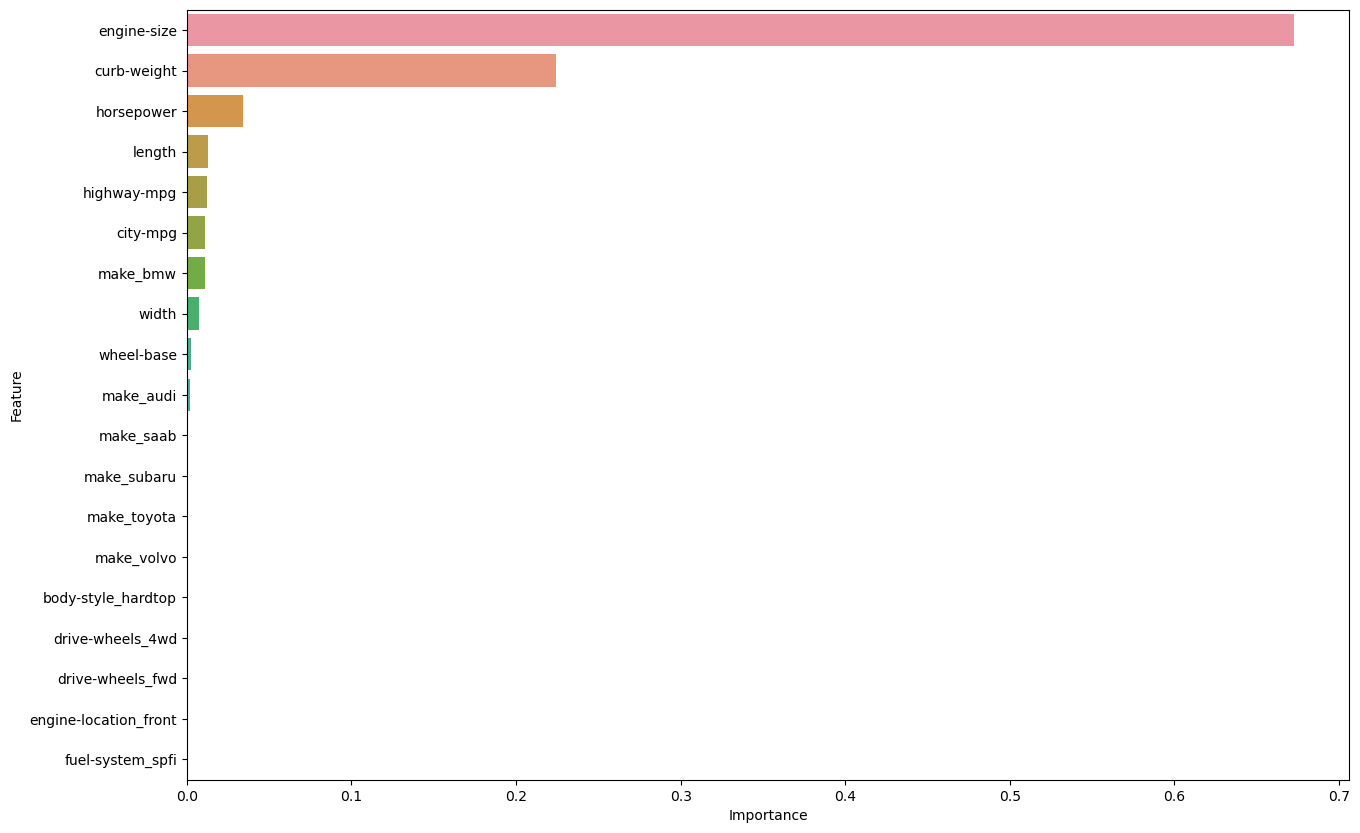

In [20]:
import matplotlib.pyplot as plt
dt1 = pd.DataFrame({'Feature': lst, 'Importance': feature_importance})
dt1 = dt1.sort_values(by='Importance', ascending=False)
dt1.reset_index(drop=True, inplace=True)
dt1 = dt1.drop(list(np.arange(10,61)))
plt.figure(figsize=(15,10))
sns.barplot(x='Importance', y='Feature', data=dt1)

#### Considering only 6 features & checking the r2_score
imp_features = [make, engine size, curb weight, horse power, width, city-mpg]

In [21]:
imp_features = ['make', 'length', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg']
#Create a list of numerical feature & categorical features
num_imp_features = [feature for feature in imp_features if car_data[feature].dtype != 'O']
cat_imp_features = [feature for feature in imp_features if car_data[feature].dtype == 'O']

In [22]:
# This performs data scaling & onhotencoding
transformation = DataTransformation(num_imp_features, cat_imp_features)
preprocessor = transformation.data_transformation()
x1 = df1.drop(columns = ['price'], axis=1)
input_features = preprocessor.fit_transform(x1).toarray()
input_features.shape

(201, 27)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(input_features, df1['price'], test_size=0.2, random_state=1)
model_report = dict=evaluate_models(x_train, y_train, x_test, y_test, models)
model_report

{'Decision Tree': 0.8909054237209292,
 'Linear Regresssion': 0.8994963703657896,
 'K-Neighbors Regressor': 0.8328139164787478}

### This concludes even after using small number of features, we can achieve the same accuracy.
Let us use only these 6 features to predict the price & deploy in Google Cloud